# Oral Insulin Phase II Clinical Trial Data Analysis

#### <i> By Samuel Oyedele </i>

## Introduction

<h5> What is Insulin? </h5> 
<p> Insulin is a naturally occurring hormone your pancreas makes that’s essential for allowing your body to use sugar (glucose) for energy. If your pancreas doesn’t make enough insulin or your body doesn’t use insulin properly, it leads to high blood sugar levels (hyperglycemia). This results in diabetes. </p>
<h5> Administration of insulin for diabetes </h5>
<p> There are many different types of insulin. Most types are injectable, either through a needle, pen or pump. There’s also inhalable insulin.</p>
<p> You can read more on insulin <a href='https://my.clevelandclinic.org/health/body/22601-insulin'>here</a>


## Datasets
The dataset is phase two clinical trial data of 350 patients for a new innovative oral insulin called Auralin - a proprietary capsule that can solve this stomach lining problem.

Phase two trials are intended to:
- Test the efficacy and the dose response of a drug
- Identify adverse reactions


In this trial, half of the patients are being treated with Auralin, and the other 175 being treated with a popular injectable insulin called Novodra. By comparing key metrics between these two drugs, we can determine if Auralin is effective.

## Questions
- Does weight have an effect on diabetes?
- What are the adverse reactions for the treatments?
- Mean Insulin Dose Change (IU)
- Relationship between the dose_change and hbalc_change over treatments.
- Mean Hba(hemoglobin A1c) change over insulin treatments.


## Data Wrangling
In this section, all three pieces of data are gathered, accessed its quality and tidiness issues and cleaned the data for better analysis and visualization.

### Gather
In this section, the three pieces of data are loaded to dataframes using pandas `read_csv`.

In [1]:
# import the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the dataset files
patient_df = pd.read_csv('patients.csv')
treatment_df = pd.read_csv('treatments.csv')
adv_reaction_df = pd.read_csv('adverse_reactions.csv')

### Assess
In this section, the datasets are accessed to detect quality and tidiness issues using visual and programmatic assessments. 

#### Patients table

In [3]:
#preview data
patient_df.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [4]:
# data columns information
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [5]:
# summary statistics
patient_df.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [6]:
# check for surname duplicates
patient_df.surname.value_counts()

surname
Doe            6
Jakobsen       3
Taylor         3
Ogochukwu      2
Tucker         2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: count, Length: 466, dtype: int64

In [7]:
# filter out duplicated address
patient_df[patient_df['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


#### Treatments table

In [8]:
# preview data
treatment_df.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [9]:
# data columns information
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [10]:
# summary statistics
treatment_df.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [11]:
# sum duplicated values
treatment_df.duplicated().sum()

1

#### Adverse Reactions table

In [12]:
# preview data
adv_reaction_df.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [13]:
# data columns information
adv_reaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [14]:
# sum duplicated values
adv_reaction_df.duplicated().sum()

0

### Data Quality Issues

#### Patients table
- Inconsistent data in the zip code column.  Zip code should be string not float
- Height column: `Tim Neudorf` height is 27 inches instead of 72 inches
- Default John Doe data
- Given name column: Inaccurate data for `Dsvid` instead of `David`
- State column: Inconsistent data, using full and abbreviation names.
- Data type issue: assigned sex, state, zip code and birthdate columns. 
- Multiple phone numbers format.
- Multiple records for Jakobsen, Taylor, Gersten.
- kgs instead of lbs for Zaitseva weight.
- Null values in address,city, state, zip code, country, and contact columns.

#### Treatments
- Missing values in hba1c change column.
- Invalid data in auralin and novodra columns.
- lowercase given name and surname.
- Missing records: 280 records instead of 350 records.
- Data type issue: auralin and novodra columns
- Inaccurate data in hbalc change column (0.4s mistaken as 0.9s)
- Nulls represented as dashes (-) in auralin and novodra columns.

#### Adverse reactions table
- lowercase given name and surname


### Tidiness Issues
- Contact column in `patients` table should be split into phone number and email
- Three variables in two columns in `treatments` table (treatment, start dose and end dose)
- Adverse reaction should be part of the `treatments` table
- Given name and surname columns in `patients` table duplicated in treatments and adverse_reactions tables

### Clean
In this section, the quality and tidiness issues are cleaned for better analysis and visualization.

In [15]:
# copy of the datasets

patients_clean = patient_df.copy()
adv_reactions_clean = adv_reaction_df.copy()
treatments_clean = treatment_df.copy()

### Missing Data

#### Treatments
- Missing records: 280 records instead of 350 records.

#### Define

- Import and assess the missing treatments_cut records into a dataframe.
- Concatenate the treatments records with the missing treatments_cut records to get the 350 records.

#### Code

In [16]:
# Import and assess the missing treatments_cut records into a dataframe.
treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_cut.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [17]:
# Concatenate the treatments records with the missing treatments_cut records.
treatments_clean = pd.concat([treatments_clean, treatments_cut],ignore_index=True)

#### Test

In [18]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    350 non-null    object 
 1   surname       350 non-null    object 
 2   auralin       350 non-null    object 
 3   novodra       350 non-null    object 
 4   hba1c_start   350 non-null    float64
 5   hba1c_end     350 non-null    float64
 6   hba1c_change  213 non-null    float64
dtypes: float64(3), object(4)
memory usage: 19.3+ KB


#### Treatments
- Missing values in hba1c change column.
- Inaccurate data in hbalc change column (0.4s mistaken as 0.9s)

#### Define

- Recalculate the hbalc change column

#### Code

In [19]:
# substract hba1c_end from hba1c_start
treatments_clean['hba1c_change'] = treatments_clean['hba1c_start'] - treatments_clean['hba1c_end']

#### Test

In [20]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


### Tidiness issue

- Contact column in patients table should be split into phone number and email.

#### Define

- `patients table`: Create new columns 'phone number' and 'email' by using regular expression to extract the phone number and email values from the contact column respectively
- Drop the contact column.

#### Code

In [21]:
patients_clean['phone_no'] = patients_clean.contact.str.extract('(\+?1?[\s-]?\(?\d{3}\)?[\s-]\d{3}[\s-]\d{4})', expand=True)
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.]+@\w+\.\w+)', expand=True)

# drop contact column
patients_clean = patients_clean.drop('contact', axis=1)

#### Test

In [22]:
patients_clean['email'].sort_values().head()

404            AaliyahRice@dayrep.com409
332               AbelEfrem@fleckens.hu1
258             AbelYonatan@teleworm.us1
305    AddolorataLombardi@jourrapide.com
118         AdibMutazzGhanem@fleckens.hu
Name: email, dtype: object

In [23]:
# list of patients column
patients_clean.columns

Index(['patient_id', 'assigned_sex', 'given_name', 'surname', 'address',
       'city', 'state', 'zip_code', 'country', 'birthdate', 'weight', 'height',
       'bmi', 'phone_no', 'email'],
      dtype='object')

#### `treatments`: Three variables in two columns in treatments table (treatment, start dose and end dose)

#### Define

- Use pandas 'melt' to melt the auralin and novodra columns into treatments and dose columns
- Split the dose column into dose_start and dose_end using 'str.split'
- Drop the dose column.

#### Code

In [24]:
# melt the auralin and novodra columns
treatments_clean = pd.melt(treatments_clean, id_vars = ['given_name', 'surname','hba1c_start',
       'hba1c_end', 'hba1c_change'], var_name = 'treatment',value_name = 'dose', ignore_index = False )
# filter out dash values '-'
treatments_clean = treatments_clean[treatments_clean['dose']  != '-']

In [25]:
# split the dose column
treatments_clean[['dose_start', 'dose_end']] = treatments_clean['dose'].str.split('-', expand=True)

In [26]:
# drop dose column
treatments_clean.drop('dose', axis=1, inplace=True)

#### Test

In [27]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 348
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    350 non-null    object 
 1   surname       350 non-null    object 
 2   hba1c_start   350 non-null    float64
 3   hba1c_end     350 non-null    float64
 4   hba1c_change  350 non-null    float64
 5   treatment     350 non-null    object 
 6   dose_start    350 non-null    object 
 7   dose_end      350 non-null    object 
dtypes: float64(3), object(5)
memory usage: 24.6+ KB


In [28]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


#### `treatments`: Adverse reaction should be part of the treatments table

#### Define

- Merge treatments and adverse reaction table join on given name and surname columns

#### Code

In [29]:
treatments_clean = pd.merge(treatments_clean, adv_reactions_clean, on = ['given_name', 'surname'], how='left')


#### Test

In [30]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


#### `treatments`: Given name and surname columns in patients table duplicated in treatments and adverse_reactions tables

#### Define

- Adverse reaction table is no longer needed. extract patient id, given name, surname from patients table.
- Convert them to lowercase and merge to treatments table join on given name, surname.
- Drop the given name and surname in treatments table.

#### Code

In [31]:
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()

# merge treatments table and id_names
treatments_clean = pd.merge(treatments_clean, id_names, on = ['given_name', 'surname'])

C:\Users\Samizic09\AppData\Local\Temp\ipykernel_3728\2927633746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.given_name = id_names.given_name.str.lower()
C:\Users\Samizic09\AppData\Local\Temp\ipykernel_3728\2927633746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.surname = id_names.surname.str.lower()


In [32]:
# drop given and surname
treatments_clean.drop(['given_name', 'surname'], axis=1, inplace=True)

#### Test

In [33]:
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15


In [34]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       349 non-null    float64
 1   hba1c_end         349 non-null    float64
 2   hba1c_change      349 non-null    float64
 3   treatment         349 non-null    object 
 4   dose_start        349 non-null    object 
 5   dose_end          349 non-null    object 
 6   adverse_reaction  35 non-null     object 
 7   patient_id        349 non-null    int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 21.9+ KB


### Quality issue

#### `Patients table`
- Height column: Tim Neudorf height is 27 inches instead of 72 inches
- Given name column: Inaccurate data for Dsvid instead of David
- Default John Doe data

#### Define

- Replace 27 in with 72 in using `str.replace`
- Replace 'Dsvid' with 'David' using `str.replace`
- drop `John Doe` records.

#### Code

In [35]:
# replace 27 in with 72 in using str.replace
patients_clean['height'] = patients_clean['height'].replace(27, 72)

In [36]:
# replace 'Dsvid' with 'David' using str.replace
patients_clean['given_name'] = patients_clean['given_name'].replace('Dsvid', 'David')

In [37]:
# drop John Doe data
patients_clean = patients_clean[patients_clean['surname'] != 'Doe']

#### Test

In [38]:
# recheck the value
patients_clean[patients_clean['height'] == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_no,email


In [39]:
# recheck the value
patients_clean[patients_clean['given_name'] == 'Dsvid']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_no,email


In [40]:
# should not include Doe records
patients_clean.surname.value_counts()

surname
Jakobsen       3
Taylor         3
Aranda         2
Tucker         2
Souza          2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: count, Length: 465, dtype: int64

#### `patients`: Inconsistent data in the zip code column. Zip code should be string not float

#### Define

- Convert zip code column datatype from float to string using `astype`
- Remove '0' using string slicing and pad four digit zip codes with a leading 0.

#### Code

In [41]:
# Convert zip code column datatype from float to string using astype
patients_clean['zip_code'] = patients_clean['zip_code'].astype(str)

In [42]:
# Remove '0' using string slicing and pad four digit zip codes with a leading 0.
patients_clean['zip_code'] = patients_clean['zip_code'].str[:-2].str.pad(5, fillchar='0')

#### Test

In [43]:
patients_clean['zip_code']

0      92390
1      61812
2      68467
3      07095
4      36303
       ...  
498    03852
499    86341
500    64110
501    98109
502    68324
Name: zip_code, Length: 497, dtype: object

#### `patients`: State column: Inconsistent data, using full and abbreviation names.

#### Define

Replace the full state names with their respective abbreviations names

#### Code

In [44]:
# Replace the full state names
patients_clean.state = patients_clean.state.replace(['California', 'Illinois', 'Nebraska', 'Florida', 'New York'], 
                                                    ['CA', 'IL', 'NE', 'FL', 'NY'])

#### Test

In [45]:
patients_clean.state.value_counts()

state
CA    60
NY    41
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NE     6
KS     6
ID     6
NV     6
SC     5
IA     5
CT     5
RI     4
ND     4
AR     4
AZ     4
ME     4
CO     4
MD     3
DE     3
SD     3
WV     3
OR     3
VT     2
MT     2
DC     2
AK     1
NM     1
NH     1
WY     1
Name: count, dtype: int64

####  `patients`: Data type issue: assigned sex, state, zip code and birthdate columns.
#### `treatment`: Data type issue: auralin and novodra columns.

#### Define

NB: The zip code column datatype has been changed earlier.
- Change the assigned sex datatype to category in patients clean table.
- Change the state datatype to category in patients clean table.
- Change the birthdate column to datetime in patients clean table.
- Strip 'u' from dose start and dose end columns in treatments clean table using 'str.strip()' and change them to integer data types.

#### Code

In [46]:
# Change the assigned sex datatype to category in patients clean table
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')

# Change the state datatype to category in patients clean table
patients_clean.state = patients_clean.state.astype('category')

# Change the birthdate columns to datetime in patients clean table
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

In [47]:
# Strip 'u' from dose start column in treatments clean table
treatments_clean.dose_start = treatments_clean.dose_start.str[0:2]

In [48]:
# Strip 'u' from dose end column in treatments clean table
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u')

In [49]:
# Change their datatype to integer
treatments_clean.dose_start = treatments_clean.dose_start.astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.astype(int)

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


#### Test

In [50]:
# check the datatypes
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    497 non-null    int64         
 1   assigned_sex  497 non-null    category      
 2   given_name    497 non-null    object        
 3   surname       497 non-null    object        
 4   address       485 non-null    object        
 5   city          485 non-null    object        
 6   state         485 non-null    category      
 7   zip_code      497 non-null    object        
 8   country       485 non-null    object        
 9   birthdate     497 non-null    datetime64[ns]
 10  weight        497 non-null    float64       
 11  height        497 non-null    int64         
 12  bmi           497 non-null    float64       
 13  phone_no      485 non-null    object        
 14  email         485 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(2)

In [51]:
# check the datatypes
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       349 non-null    float64
 1   hba1c_end         349 non-null    float64
 2   hba1c_change      349 non-null    float64
 3   treatment         349 non-null    object 
 4   dose_start        349 non-null    int32  
 5   dose_end          349 non-null    int32  
 6   adverse_reaction  35 non-null     object 
 7   patient_id        349 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 19.2+ KB


In [52]:
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345
3,7.89,7.55,0.34,auralin,31,38,NaN,276
4,7.76,7.37,0.39,auralin,30,36,NaN,15


#### Multiple phone number formats

#### Define

Replace the string ('+", "-", "()","") and use pad to fill the first charcacter to 1 where phone number length is 10 digits.

#### Code

In [53]:
patients_clean.phone_no = patients_clean.phone_no.str.replace('\D+', '', regex=True).str.pad(11, fillchar='1')

#### Test

In [54]:
patients_clean.phone_no

0      19517199170
1      12175693204
2      14023636804
3      17326368246
4      13345157487
          ...     
498    12074770579
499    19282844492
500    18162236007
501    13604432060
502    14028484923
Name: phone_no, Length: 497, dtype: object

#### `patients table`: Multiple records for Jakobsen, Gersten, Taylor

#### Define

Remove the Jake Jakobsen, Pat Gersten, and Sandy Taylor duplicated rows from the patients table.

#### Code

In [55]:
patients_clean = patients_clean[~((patients_clean.address.duplicated()) & patients_clean.address.notnull())]

#### Test

In [56]:
patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_no,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com1


In [57]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_no,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com402


In [58]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_no,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


#### kgs instead of lbs for Zaitseva weight

#### Define

Isolate the row where the surname is Zaitseva and convert the entry in its weight field from kg to lbs using indexing.

#### Code

In [59]:
# mask the row and change the weight values
weight_kg = patients_clean['weight'].min()
mask = patients_clean['surname'] == 'Zaitseva'
col_name = 'weight'
patients_clean.loc[mask, col_name] = weight_kg * 2.20462

#### Test

In [60]:
# min weight is now above 48.8
patients_clean['weight'].sort_values()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 494, dtype: float64

#### `patients table`: Null values in address,city, state, zip code, country, and contact columns

#### Define

Drop null values using `pandas dropna`

#### Code

In [61]:
patients_clean.dropna(axis=0, inplace=True)

#### Test

In [62]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 501
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    482 non-null    int64         
 1   assigned_sex  482 non-null    category      
 2   given_name    482 non-null    object        
 3   surname       482 non-null    object        
 4   address       482 non-null    object        
 5   city          482 non-null    object        
 6   state         482 non-null    category      
 7   zip_code      482 non-null    object        
 8   country       482 non-null    object        
 9   birthdate     482 non-null    datetime64[ns]
 10  weight        482 non-null    float64       
 11  height        482 non-null    int64         
 12  bmi           482 non-null    float64       
 13  phone_no      482 non-null    object        
 14  email         482 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(2)

## Key Metrics

#### Featuring Engineering

- Create new column dose change from dose start and dosen end in `treatments table`

In [63]:
treatments_clean['dose_change'] = treatments_clean['dose_start'] - treatments_clean['dose_end']

#### Height

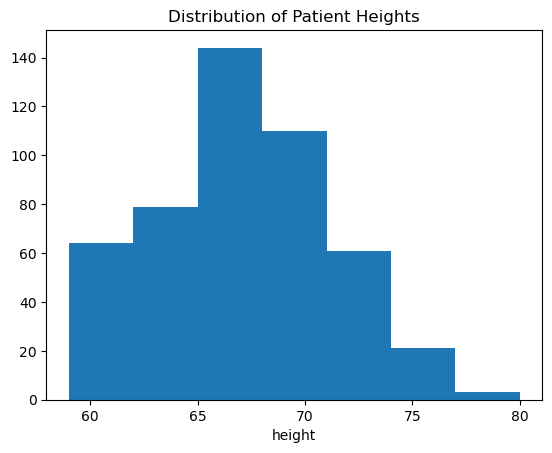

In [64]:
# create bins
bins = np.arange(59, patients_clean['height'].max()+3, 3)

# plot a histogram
plt.hist(data=patients_clean, x='height', bins=bins)
plt.xlabel('height')
plt.title("Distribution of Patient Heights")
plt.show();

### Does weight have an effect on diabetes?

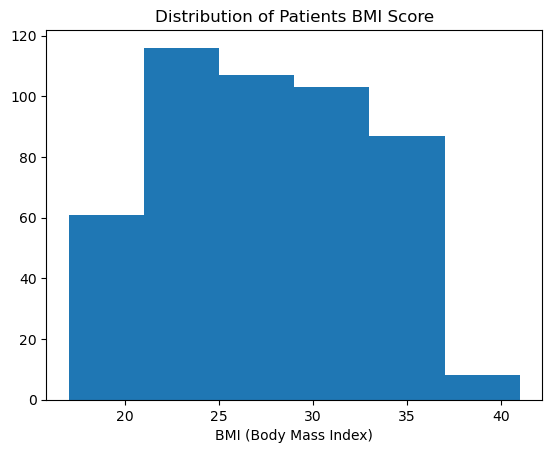

In [65]:
# create bins
bins = np.arange(17, patients_clean['bmi'].max()+4,4)

# plot a histogram of patients bmi score
plt.hist(data=patients_clean, x='bmi', bins=bins)
plt.xlabel('BMI (Body Mass Index)')
plt.title('Distribution of Patients BMI Score')
plt.show();

> Diabetic Patients with healthy weight (18.5 – 24.9) and overweight (25.0 – 29.9) tend to have more frequency scores compared to other weight status. From the distribution, weight seems to have less impact on diabetes.

    Note: Statistical models can be performed to get more insights on this distribution.

### What are the trials' adverse reactions?

In [66]:
reaction_count = treatments_clean.groupby("treatment")['adverse_reaction'].value_counts()
reaction_count = reaction_count.reset_index(name='count')
reaction_count

,treatment,adverse_reaction,count
0,auralin,hypoglycemia,10
1,auralin,throat irritation,2
2,auralin,cough,1
3,auralin,headache,1
4,auralin,nausea,1
5,novodra,hypoglycemia,10
6,novodra,injection site discomfort,6
7,novodra,headache,2
8,novodra,cough,1
9,novodra,nausea,1


In [67]:
auralin_reaction = reaction_count[reaction_count['treatment'] == 'auralin']
novodra_reaction = reaction_count[reaction_count['treatment'] == 'novodra']

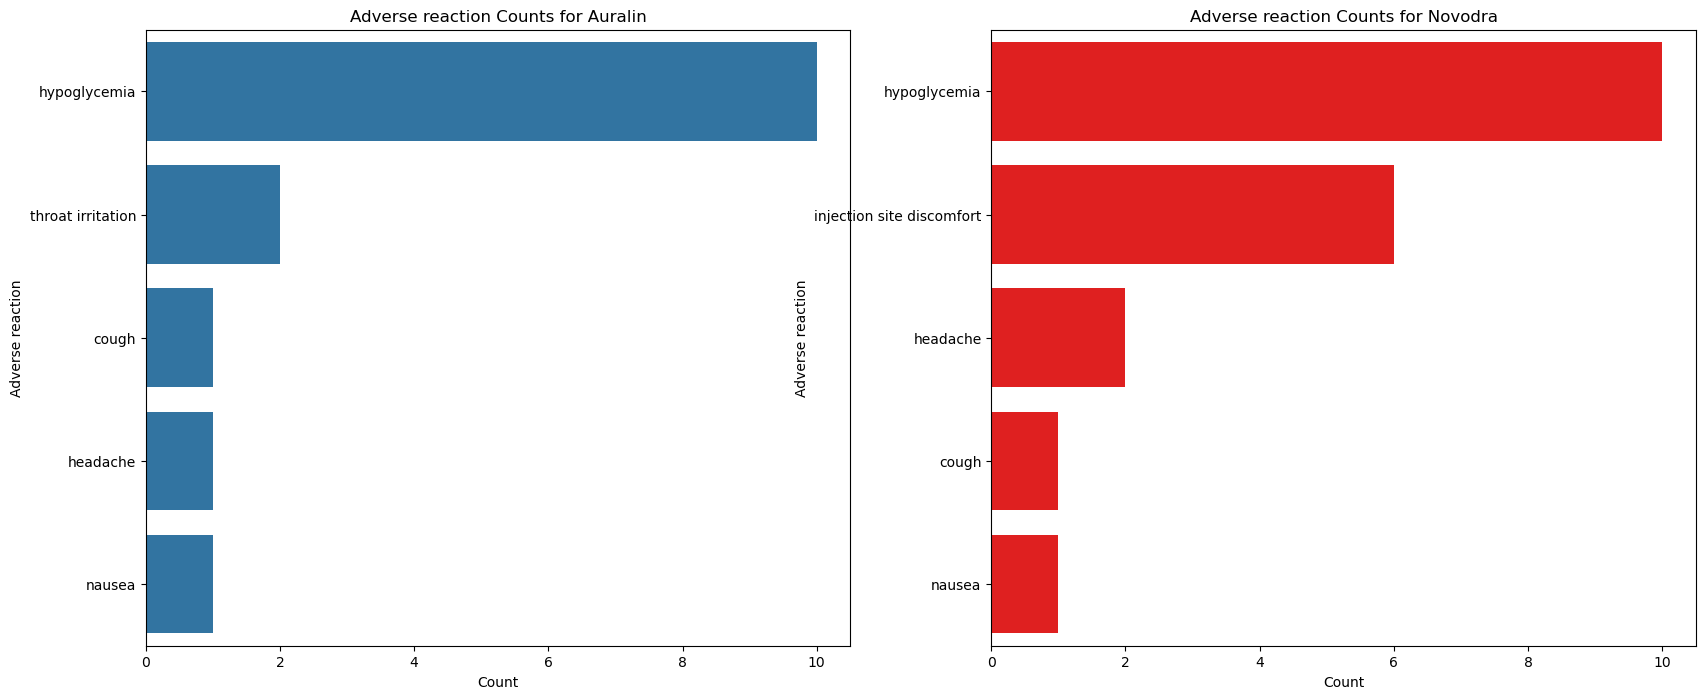

In [68]:
# plot horizonal bar chart

base_color = sns.color_palette()[0]

# plot a figure
plt.figure(figsize=(20,8))

# auralin adverse reactions
plt.subplot(1,2,1)
sns.barplot(data=auralin_reaction, y='adverse_reaction', x='count', color=base_color)
plt.xlabel('Count')
plt.ylabel('Adverse reaction')
plt.title('Adverse reaction Counts for Auralin')

# novodra adverse reactions
plt.subplot(1,2,2)
sns.barplot(data=novodra_reaction, y='adverse_reaction', x='count', color='red')
plt.xlabel('Count')
plt.ylabel('Adverse reaction')
plt.title('Adverse reaction Counts for Novodra')
plt.show();

> Auralin and Novodra insulins have similar adverse reactions excluding throat irritation and injection site discomfort. Throat irritation for Auralin, which is expected because this pill is taken orally while injection site discomfort for Novodra, which is caused by injection needles.

### Mean Insulin Dose Change (IU)
Note: Insulin is measure by units (1u or 1units)

In [69]:
mean_dose = treatments_clean.groupby('treatment')['dose_change'].mean()
mean_dose = mean_dose.reset_index(name='mean')
mean_dose

,treatment,mean
0,auralin,-8.325714
1,novodra,0.385057


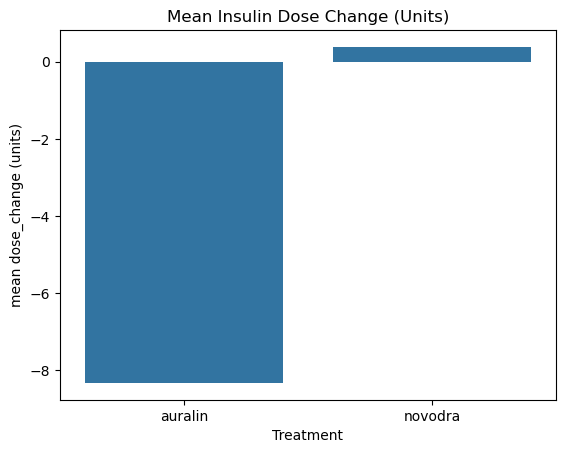

In [70]:
# plot bar chart

sns.barplot(data=mean_dose, x='treatment', y='mean', color=base_color)
plt.xlabel('Treatment')
plt.ylabel('mean dose_change (units)')
plt.title('Mean Insulin Dose Change (Units)')
plt.show();

> Auralin patients required an average of 8 more units of insulin to establish a normal blood sugarlevel compared to Novodra patients who required an average of 0.4 units less of insulin.

### Relationship between the dose_change and hbalc_change over treatments

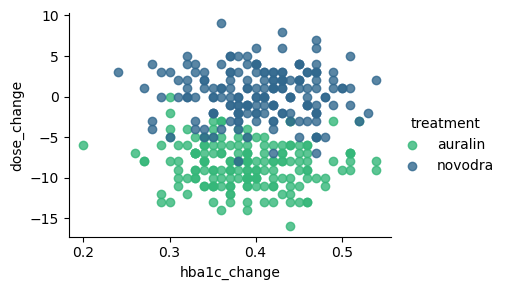

In [71]:
g = sns.FacetGrid(data=treatments_clean, hue='treatment', aspect=1.4, palette='viridis_r')
g.map(sns.regplot, 'hba1c_change', 'dose_change', fit_reg=False)
g.add_legend();

> From the visualization, Auralin (oral) insulin required more dosage of the insulin to help reduce the hbalc (hemoglobin A1c) while Novodra (injectable) insulin required less dosage of the insulin to help reduce the hbalc (hemoglobin A1c).

### Mean (haemoglobin A1c) change over insulins (Auralin and Novodra)

In [72]:
hba1c_mean = treatments_clean.groupby('treatment')['hba1c_change'].mean()
hba1c_mean = hba1c_mean.reset_index(name='mean')
hba1c_mean

,treatment,mean
0,auralin,0.387657
1,novodra,0.404713


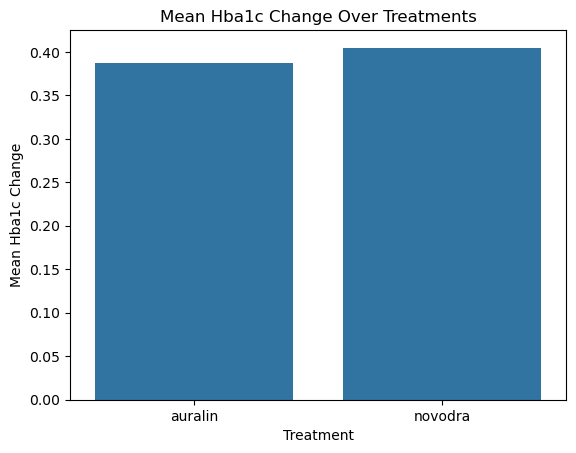

In [73]:
# plot bar chart
base_color = sns.color_palette()[0]

sns.barplot(data=hba1c_mean, x = 'treatment', y='mean', color=base_color)
plt.xlabel('Treatment')
plt.ylabel('Mean Hba1c Change')
plt.title('Mean Hba1c Change Over Treatments')
plt.show()

> The difference in the Mean Hba1c Change of Auralin and Novodra is much smaller which may imply the new oral insulin is effective and can help reduce high blood sugar level.

### Confidence Interval

We want the upper limit of the confidence interval of the differences in means hbA1c change of the insulins to be less than 0.4, meaning that if the difference in means is less than 0.4, we can be highly confident that our results are meaningful.

In [74]:
CI_upper_limit = hba1c_mean.iloc[1,1] - hba1c_mean.iloc[0,1]
CI_upper_limit

0.017055500821018144

> 0.016 is significantly lower than 0.4 (confidence interval), which means that Auralin oral insulin is similarly effective to Novodra injectable insulin.

### Key Findings:

> <li> Diabetic Patients with healthy weight (18.5 – 24.9) and overweight (25.0 – 29.9) tend to have more frequency scores compared to other weight status. From the distribution, weight seems to have less impact on diabetes. </li>
> <li> Auralin and Novodra insulins have similar adverse reactions excluding throat irritation and injection site discomfort. Throat irritation for Auralin, which is expected because the pill is taken orally while injection site discomfort for Novodra, which is caused by injection needles. </li>
> <li> Auralin patients required an average of 8 more units of insulin to establish a normal blood sugar level compared to Novodra patients who required an average of 0.4 units less of insulin. </li>
> <li> The difference in the Mean Hba1c Change of Auralin and Novodra is much smaller which may imply the new oral insulin is effective and can help reduce high blood sugar level. </li>
> <li> Auralin (oral) insulin required more dosage of the insulin to help reduce the hbalc (hemoglobin A1c) while Novodra (injectable) insulin required less dosage of the insulin to help reduce the hbalc (hemoglobin A1c). </li>
> <li> 0.016 is significantly lower than 0.4 (confidence interval), which means that Auralin oral insulin is similarly effective to Novodra injectable insulin. </li>

#### Limitation
> - The datasets are not based on consecutive weeks trials of the treatments, which made it hard to provide more data insights using statistical models.
> - The datasets are not real but they are constraints to real-world insulin treatment data.
